In [60]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading data

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
df.columns = df.columns.str.lower()


In [4]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Exploratory Data Analysis and Data Cleaning

In [5]:
df.shape

(119390, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


### Almost half of the booking were made from portugal 
### in this case city hotel is more favored compared to resort hotel 
### there is a discrepancy of reserved room type and assigned room type 
### hotel might have room that's not sold to the public 
### no deposit here might have a reason why cancellation is high (since customer will not have anything to lose in this no deposit case)
### most popular room is room type A

In [8]:
df.isnull().sum()
# there are some columns with null value in the data frame we will need to imputing, and filling some random value 
# and there's huge amount of missing value in the company column this might need to be drop

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
df.drop(['company','agent'],axis = 1, inplace = True)
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Drop value that is abnormal

In [11]:
# since it's impossible to have 0 adults to book a hotel room 

df.drop(labels = df[df['adults'] == 0].index, axis = 0, inplace = True)
df[df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [12]:
# there are a value of a adr columns that below 0 since it is impossible for hotel to owe money to the guest 
df = df.drop(df[df.adr < 0].index)
df[df['adr'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## Visualize data

Text(0, 0.5, 'number of reservations')

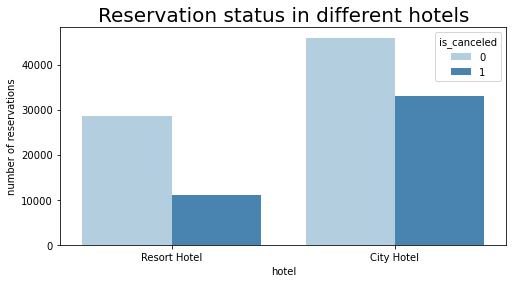

In [13]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled',data = df, palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
plt.title('Reservation status in different hotels',size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')

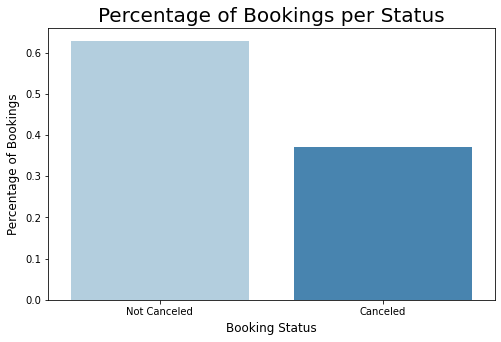

In [14]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
plt.title("Percentage of Bookings per Status", size = 20)
sns.barplot(x=df['is_canceled'].unique(), y=df['is_canceled'].value_counts(normalize=True), palette = 'Blues')
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

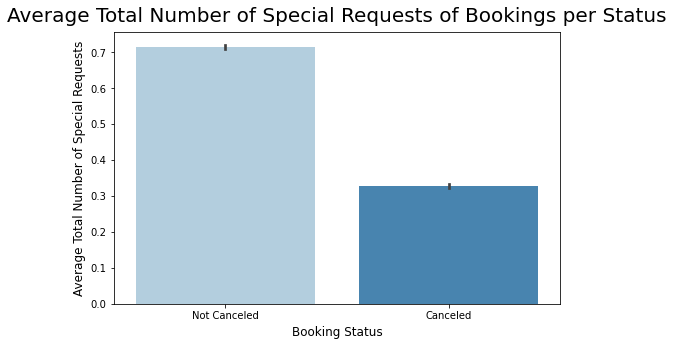

In [15]:
# Visualizing the total number of special requests for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Total Number of Special Requests of Bookings per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['total_of_special_requests'], palette = 'Blues')
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);


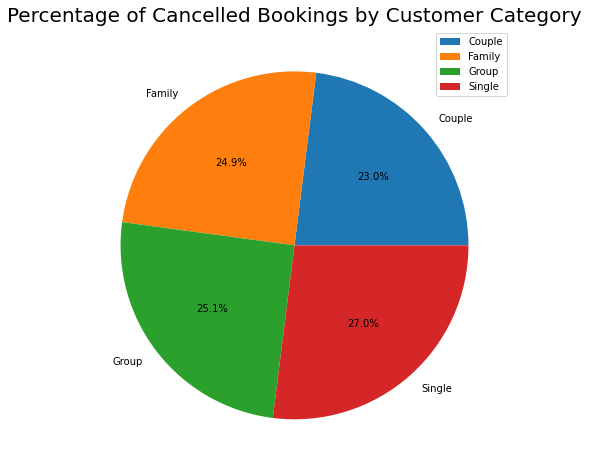

In [16]:

# Define a function to categorize customers based on number of adults and children/babies
def customer_category(row):
    if row["adults"] == 1 and row["children"] == 0 and row["babies"] == 0:
        return "Single"
    elif row["adults"] == 2 and row["children"] == 0 and row["babies"] == 0:
        return "Couple"
    elif row["adults"] > 2 and row["children"] == 0 and row["babies"] == 0:
        return "Group"
    elif row["adults"] >= 1 and (row["children"] > 0 or row["babies"] > 0):
        return "Family"
    else:
        return "Single"

# Apply the customer_category function to create a new "Customer Category" column
df["Customer Category"] = df.apply(customer_category, axis=1)

# Group the DataFrame by Customer Category and calculate the percentage of each category that cancelled their booking
grouped = df.groupby("Customer Category")["is_canceled"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()

# Filter the grouped DataFrame to only show non-cancelled bookings
grouped = grouped[grouped["is_canceled"] == 0]

# Pivot the grouped DataFrame to reshape it for plotting
pivoted = grouped.pivot(index="Customer Category", columns="is_canceled", values="percentage")

# Plot the pie chart
pivoted.plot(kind="pie", y=0, autopct="%1.1f%%", figsize=(8, 8))
plt.ylabel("")
plt.title("Percentage of Cancelled Bookings by Customer Category", size = 20)
plt.show()

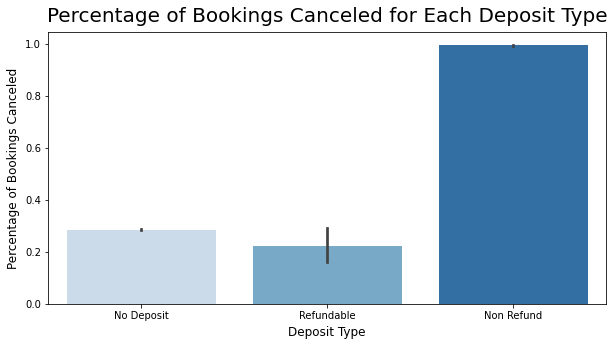

In [17]:
# Visualizing percentage of bookings canceled for each deposit type:
plt.figure(figsize=(10,5)) 
plt.title("Percentage of Bookings Canceled for Each Deposit Type", fontsize = 20, pad = 10)
sns.barplot(x=df['deposit_type'], y=df['is_canceled'], palette = 'Blues')
plt.xlabel("Deposit Type", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings Canceled", fontsize = 12, labelpad = 5);

### Why does Non Refund Deposit Type Are More Likely to Canceled Compared to Other Deposit Type
During my analysis I see that lead time have a somehow positive correlation with the cancellation the higher the lead time the more likely a guest will canceled, in this segment we want to see the median / the average lead time for each deposit type and how it might lead into cancellation rate for each deposit type

In [18]:
pd.crosstab(df['deposit_type'], 'Median Lead Time', values = df['lead_time'], aggfunc = 'median')

# this might be the reason why non refund has the highest cancellation because of the longer lead time
# from our analysis before we see that the longer the lead time the higher the chances of cancellation happening 
# as we can see from the table below Non Refund Booking Has the highest median lead time 

col_0,Median Lead Time
deposit_type,
No Deposit,57
Non Refund,183
Refundable,169


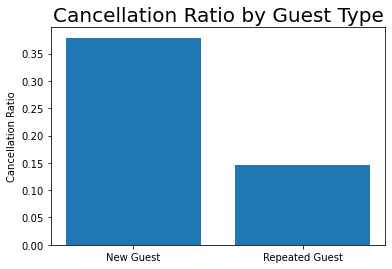

In [19]:
# Create a new dataframe with columns for guest type and cancellation status
guest_df = df[['is_repeated_guest', 'is_canceled']].copy()

# Group the dataframe by guest type and cancellation status and count the number of rows in each group
guest_table = guest_df.groupby(['is_repeated_guest', 'is_canceled']).size().reset_index(name='counts')

# Pivot the table to show cancellation status as columns
guest_pivot = guest_table.pivot(index='is_repeated_guest', columns='is_canceled', values='counts')

# Calculate the cancellation ratios for new and repeated guests
new_guest_cancel_ratio = guest_pivot.iloc[0, 1] / guest_pivot.iloc[0, :].sum()
rep_guest_cancel_ratio = guest_pivot.iloc[1, 1] / guest_pivot.iloc[1, :].sum()

# Create a bar chart to compare the cancellation ratios
fig, ax = plt.subplots()
ax.bar(['New Guest', 'Repeated Guest'], [new_guest_cancel_ratio, rep_guest_cancel_ratio])
ax.set_ylabel('Cancellation Ratio')
ax.set_title('Cancellation Ratio by Guest Type', size = 20)
plt.show()

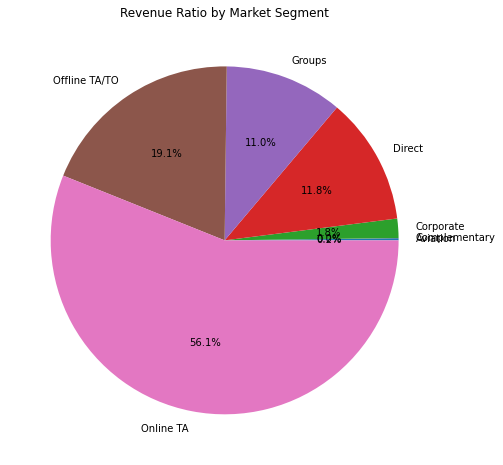

In [20]:
# Create a new dataframe with columns for market segment and total revenue
revenue_df = df[['market_segment', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights']].copy()
revenue_df['total_revenue'] = (revenue_df['adr'] * (revenue_df['stays_in_weekend_nights'] + revenue_df['stays_in_week_nights']))

# Group the dataframe by market segment and calculate the sum of total revenue in each group
revenue_table = revenue_df.groupby('market_segment')['total_revenue'].sum().reset_index()

# Create a pie chart to show the revenue ratio by market segment
fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(revenue_table['total_revenue'], labels=revenue_table['market_segment'], autopct='%1.1f%%')
ax.set_title('Revenue Ratio by Market Segment')
plt.show()


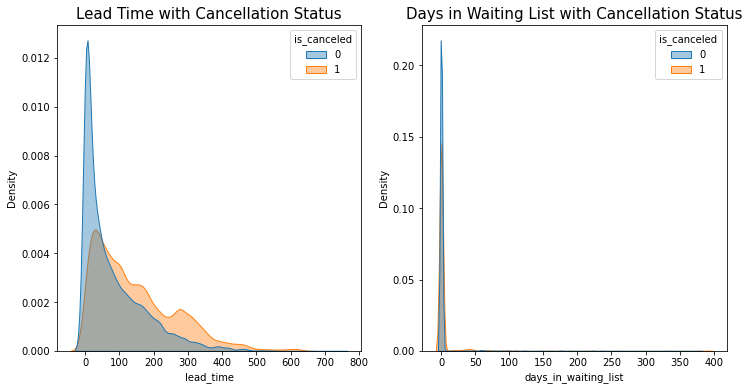

In [21]:

fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.kdeplot(data=df, x='lead_time', hue='is_canceled', fill=True, alpha=.4, common_norm=False, ax=axs[0])
axs[0].set_title('Lead Time with Cancellation Status', size = 15)

sns.kdeplot(data=df, x='days_in_waiting_list', hue='is_canceled', fill=True, alpha=.4, common_norm=False, ax=axs[1])
axs[1].set_title('Days in Waiting List with Cancellation Status', size = 15)

plt.show()

This suggests that the sooner the bookings are made customers are less likely to cancel it and lower the days in the 'days_in_waiting_list' less likely the bookings will get canceled

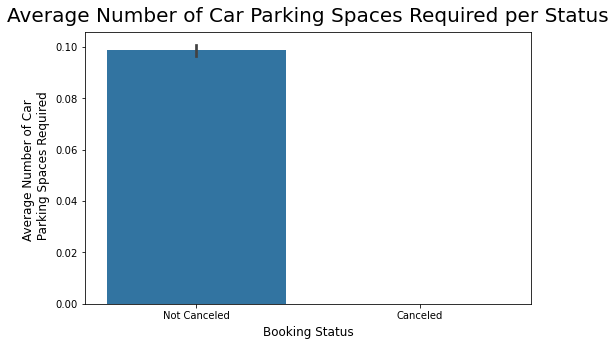

In [22]:
# Visualizing the total number of requested parking spaces for canceled and not canceled bookings:
plt.figure(figsize=(8,5)) 
plt.title("Average Number of Car Parking Spaces Required per Status", fontsize = 20, pad = 10)
sns.barplot(x=df['is_canceled'], y=df['required_car_parking_spaces'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

# here shows that customer who need a parking spot for their vehicle actually never cancelled their hotel booking,
# this could be a good insight for the hotel in term of marketing 

## Data preprocessing

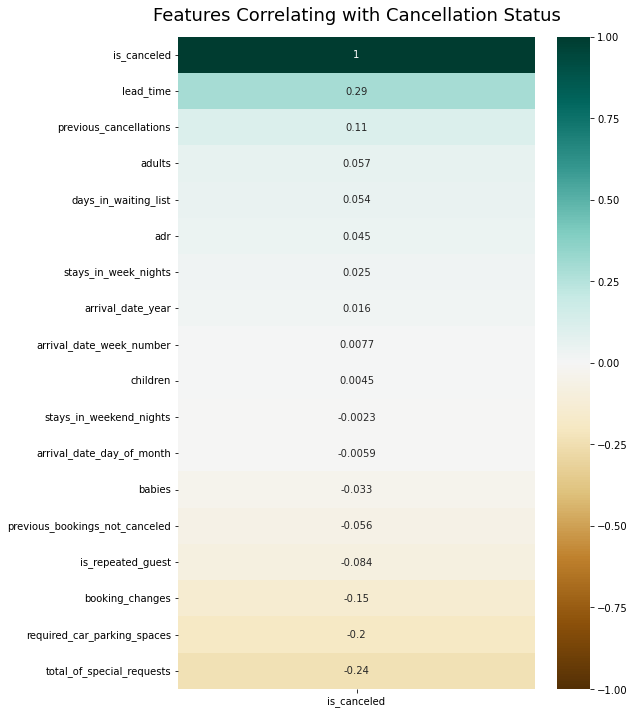

In [23]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['is_canceled']].sort_values(by='is_canceled', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Cancellation Status', fontdict={'fontsize':18}, pad=16);

In [24]:
df.drop(['arrival_date_week_number','arrival_date_day_of_month','reservation_status','arrival_date_year','assigned_room_type','booking_changes'],axis=1,inplace=True)

In [25]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Customer Category
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,0,C,No Deposit,0,Transient,0.0,0,0,2015-07-01,Couple
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,0,C,No Deposit,0,Transient,0.0,0,0,2015-07-01,Couple
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,0,A,No Deposit,0,Transient,75.0,0,0,2015-07-02,Single
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,0,A,No Deposit,0,Transient,75.0,0,0,2015-07-02,Single
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,0,A,No Deposit,0,Transient,98.0,0,1,2015-07-03,Couple


In [26]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['lead_time_days'] = df['lead_time'] / 60 / 60 / 24
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,Customer Category,total_guests,lead_time_days
0,Resort Hotel,0,342,July,0,0,2,0.0,0,BB,...,No Deposit,0,Transient,0.0,0,0,2015-07-01,Couple,2.0,0.003958
1,Resort Hotel,0,737,July,0,0,2,0.0,0,BB,...,No Deposit,0,Transient,0.0,0,0,2015-07-01,Couple,2.0,0.008530
2,Resort Hotel,0,7,July,0,1,1,0.0,0,BB,...,No Deposit,0,Transient,75.0,0,0,2015-07-02,Single,1.0,0.000081
3,Resort Hotel,0,13,July,0,1,1,0.0,0,BB,...,No Deposit,0,Transient,75.0,0,0,2015-07-02,Single,1.0,0.000150
4,Resort Hotel,0,14,July,0,2,2,0.0,0,BB,...,No Deposit,0,Transient,98.0,0,1,2015-07-03,Couple,2.0,0.000162


In [27]:
#dividing the features into categorical and continuous variables
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='object']
continuous_feature=[feature for feature in df.columns if df[feature].dtype!='object']


In [28]:
#separating the categorical and continuos features 
df_cat=df[categorical_feature]
df_num=df[continuous_feature]

In [29]:
#extracting the date and month from reservation_status_date
df_cat['year']=df_cat['reservation_status_date'].str.split('-',expand=True)[0].astype(str).astype(int)
df_cat['month']=df_cat['reservation_status_date'].str.split('-',expand=True)[1].astype(str).astype(int)

In [30]:
df_cat.drop('reservation_status_date',axis=1,inplace=True)
df_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,Customer Category,year,month
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,No Deposit,Transient,Couple,2015,7
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,No Deposit,Transient,Couple,2015,7
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,No Deposit,Transient,Single,2015,7
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,No Deposit,Transient,Single,2015,7
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,No Deposit,Transient,Couple,2015,7


In [31]:
#Encoding the categorical feature
encoder=LabelEncoder()
dict_cat={}
for feature in df_cat.columns:
    dict_cat[feature]=encoder.fit_transform(df_cat[feature])
#converting back the encoded feature into dataframe
df_cat=pd.DataFrame(dict_cat)

In [32]:
df_num.drop('is_canceled',axis=1,inplace=True)

In [33]:
#Scaling of the numerical
scaler=MinMaxScaler()
df_num=pd.DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)

In [34]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,...,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,Customer Category,year,month
0,0.464043,0.0,0.000,0.018519,0.0,0.0,0.0,0.0,0.0,0.0,...,0,135,3,1,2,0,2,0,1,6
1,1.000000,0.0,0.000,0.018519,0.0,0.0,0.0,0.0,0.0,0.0,...,0,135,3,1,2,0,2,0,1,6
2,0.009498,0.0,0.025,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,59,3,1,0,0,2,3,1,6
3,0.017639,0.0,0.025,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,59,2,0,0,0,2,3,1,6
4,0.018996,0.0,0.050,0.018519,0.0,0.0,0.0,0.0,0.0,0.0,...,0,59,6,3,0,0,2,0,1,6


## Model Selection And Evaluation

In [35]:
#splitting the data in training and test set
y=df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size = 0.30)

###  Logistic Regression

In [36]:
logreg = LogisticRegression(penalty='l2', C=0.1)
logreg.fit(X_train, y_train)
lr_pred_train = logreg.predict(X_train)
lr_pred_test = logreg.predict(X_test)
print("Logistic Regression Accuracy on Training Set:", accuracy_score(y_train, lr_pred_train))
print("Logistic Regression Accuracy on Test Set:", accuracy_score(y_test, lr_pred_test))
lr_acc_train = accuracy_score(y_train, lr_pred_train)
lr_acc = accuracy_score(y_test, lr_pred_test)
lr_recall = recall_score(y_test, lr_pred_test)
lr_f1_score = f1_score(y_test, lr_pred_test)
lr_precision = precision_score(y_test, lr_pred_test)

Logistic Regression Accuracy on Training Set: 0.7635379496576333
Logistic Regression Accuracy on Test Set: 0.7651046354635463


In [37]:
logreg = LogisticRegression(penalty='l2', C=0.1)
logreg.fit(X_train, y_train)
train_acc = accuracy_score(y_train, logreg.predict(X_train))
test_acc = accuracy_score(y_test, logreg.predict(X_test))
print('Logistic Regression with L2 regularization:')
print(f'Train accuracy: {train_acc:.4f}')
print(f'Test accuracy: {test_acc:.4f}')
print('')

Logistic Regression with L2 regularization:
Train accuracy: 0.7635
Test accuracy: 0.7651



In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, lr_pred_test))  
print('MSE:', metrics.mean_squared_error(y_test, lr_pred_test))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_test)))
print('VarScore:',metrics.explained_variance_score(y_test,lr_pred_test))

NameError: name 'metrics' is not defined

In [38]:

print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83     22354
           1       0.80      0.49      0.61     13198

    accuracy                           0.77     35552
   macro avg       0.78      0.71      0.72     35552
weighted avg       0.77      0.77      0.75     35552



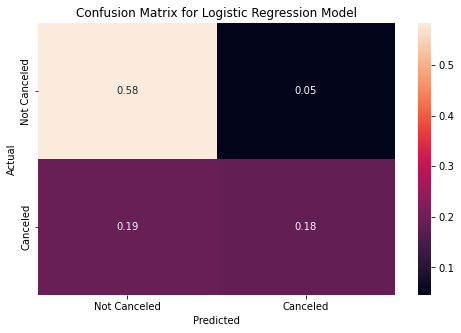

In [39]:
cf_matrix = confusion_matrix(y_test, lr_pred_test, normalize='all')
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

### KNN Model


In [40]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("KNN Accuracy on Training Set:", accuracy_score(y_train, knn_pred_train))
print("KNN Accuracy on Test Set:", accuracy_score(y_test, knn_pred_test))
knn_acc_train = accuracy_score(y_train, knn_pred_train)
knn_acc = accuracy_score(y_test, knn_pred_test)
knn_recall = recall_score(y_test, knn_pred_test)
knn_f1_score = f1_score(y_test, knn_pred_test)
knn_precision = precision_score(y_test, knn_pred_test)

KNN Accuracy on Training Set: 0.8958433793036937
KNN Accuracy on Test Set: 0.880259900990099


In [41]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
train_acc = accuracy_score(y_train, knn.predict(X_train))
test_acc = accuracy_score(y_test, knn.predict(X_test))
print('K-Nearest Neighbors with k=10:')
print(f'Train accuracy: {train_acc:.4f}')
print(f'Test accuracy: {test_acc:.4f}')
print('')

K-Nearest Neighbors with k=10:
Train accuracy: 0.8958
Test accuracy: 0.8803



In [42]:
print(classification_report(y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     22354
           1       0.95      0.71      0.82     13198

    accuracy                           0.88     35552
   macro avg       0.90      0.85      0.86     35552
weighted avg       0.89      0.88      0.88     35552



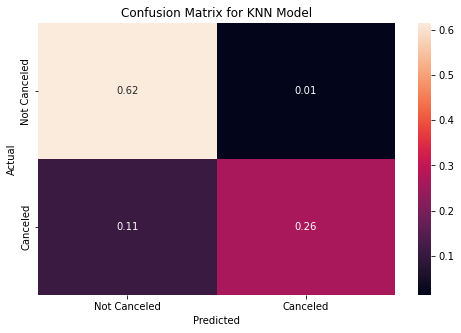

In [43]:
cf_matrix = confusion_matrix(y_test, knn_pred_test, normalize='all')
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for KNN Model')
plt.show()

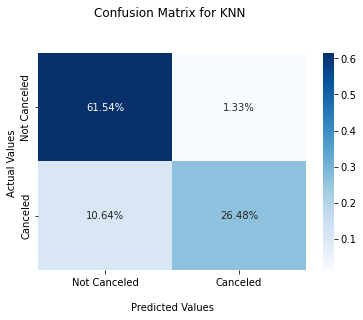

In [44]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for KNN \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Canceled','Canceled'])
ax.yaxis.set_ticklabels(['Not Canceled','Canceled'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Random Forest Model

In [45]:
rf = RandomForestClassifier(n_estimators=500, max_depth=10)
rf.fit(X_train, y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)
print("Random Forest Accuracy on Training Set:", accuracy_score(y_train, rf_pred_train))
print("Random Forest Accuracy on Test Set:", accuracy_score(y_test, rf_pred_test))
rf_acc_train = accuracy_score(y_train, rf_pred_train)
rf_acc = accuracy_score(y_test, rf_pred_test)
rf_recall = recall_score(y_test, rf_pred_test)
rf_f1_score = f1_score(y_test, rf_pred_test)
rf_precision = precision_score(y_test, rf_pred_test)
# we also have an overfitting condition for Random Forest model as well in this case 

Random Forest Accuracy on Training Set: 0.8668989295013984
Random Forest Accuracy on Test Set: 0.8662241224122412


In [46]:
rf = RandomForestClassifier(n_estimators=500, max_depth=10)
rf.fit(X_train, y_train)
train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc = accuracy_score(y_test, rf.predict(X_test))
print('Random Forest with 100 trees and max depth of 5:')
print(f'Train accuracy: {train_acc:.4f}')
print(f'Test accuracy: {test_acc:.4f}')
print('')

Random Forest with 100 trees and max depth of 5:
Train accuracy: 0.8659
Test accuracy: 0.8646



In [47]:
print(classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22354
           1       0.91      0.71      0.80     13198

    accuracy                           0.87     35552
   macro avg       0.88      0.83      0.85     35552
weighted avg       0.87      0.87      0.86     35552



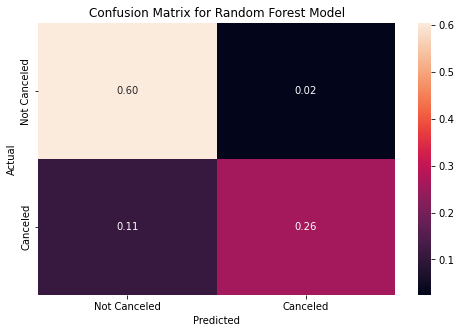

In [48]:
cf_matrix = confusion_matrix(y_test, rf_pred_test, normalize='all')
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Decision Tree Model

In [49]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)
print("Decision Tree Accuracy on Training Set:", accuracy_score(y_train, dt_pred_train))
print("Decision Tree Accuracy on Test Set:", accuracy_score(y_test, dt_pred_test))
dt_acc_train = accuracy_score(y_train, dt_pred_train)
dt_acc = accuracy_score(y_test, dt_pred_test)
dt_recall = recall_score(y_test, dt_pred_test)
dt_f1_score = f1_score(y_test, dt_pred_test)
dt_precision = precision_score(y_test, dt_pred_test)
# we see that there's overfitting condition in Decision Tree as well

Decision Tree Accuracy on Training Set: 0.8444160478348924
Decision Tree Accuracy on Test Set: 0.8408528352835284


In [50]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)
train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, dt.predict(X_test))
print('Decision Tree with max depth of 5:')
print(f'Train accuracy: {train_acc:.4f}')
print(f'Test accuracy: {test_acc:.4f}')
print('')

Decision Tree with max depth of 5:
Train accuracy: 0.8444
Test accuracy: 0.8408



In [51]:
print(classification_report(y_test, dt_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     22354
           1       0.86      0.68      0.76     13198

    accuracy                           0.84     35552
   macro avg       0.85      0.81      0.82     35552
weighted avg       0.84      0.84      0.84     35552



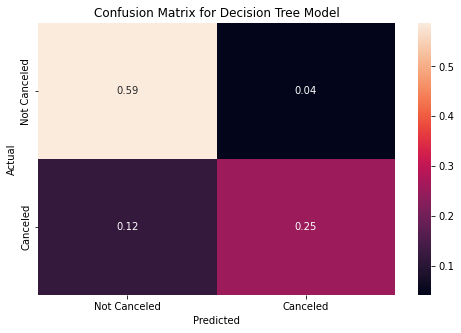

In [52]:
cf_matrix = confusion_matrix(y_test, dt_pred_test, normalize='all')
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [53]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [54]:
eval_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'],
    'Accuracy': [lr_acc, knn_acc, rf_acc, dt_acc],
    'Recall': [lr_recall, knn_recall, rf_recall, dt_recall],
    'F1_score': [lr_f1_score, knn_f1_score, rf_f1_score, dt_f1_score],
    'Precision': [lr_precision, knn_precision, rf_precision, dt_precision]})

eval_base = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'],
    'Train': [lr_acc_train, knn_acc_train, rf_acc_train, dt_acc_train],
    'Test': [lr_acc, knn_acc, rf_acc, dt_acc]})

display_side_by_side([eval_table, eval_base], ['Evaluation Matrix', 'Accuracy Train & Test'])


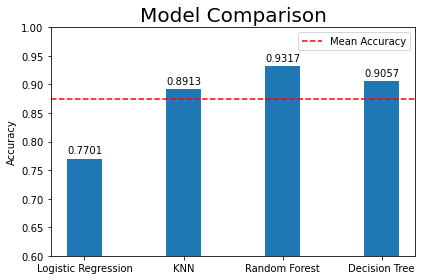

In [55]:
# Train and evaluate models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree']

test_acc = []

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

test_acc.append(accuracy_score(y_test, lr.predict(X_test)))

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

test_acc.append(accuracy_score(y_test, knn.predict(X_test)))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

test_acc.append(accuracy_score(y_test, rf.predict(X_test)))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

test_acc.append(accuracy_score(y_test, dt.predict(X_test)))

# Plot bar chart
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots()
rects = ax.bar(x, test_acc, width)
ax.set_ylabel('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim([0.6, 1])
ax.axhline(y=np.mean(test_acc), color='r', linestyle='--', label='Mean Accuracy')
ax.legend()
ax.set_title('Model Comparison', size = 20)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects)
fig.tight_layout()
plt.show()

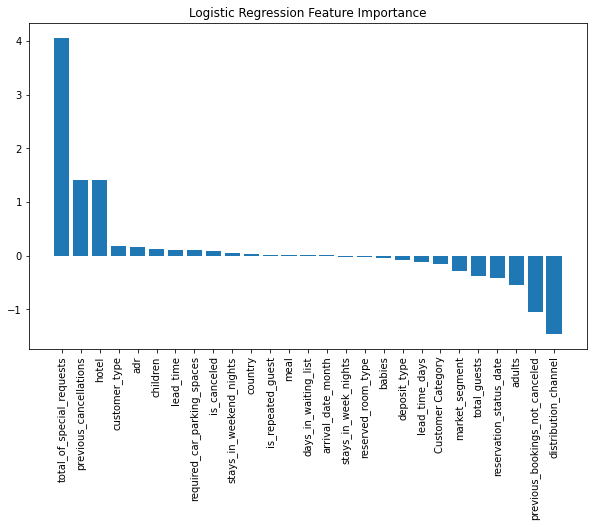

In [56]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

importance_lr = lr.coef_[0]
sorted_idx_lr = np.argsort(importance_lr)[::-1]
features_lr = df.columns

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx_lr)), importance_lr[sorted_idx_lr])
plt.xticks(range(len(sorted_idx_lr)), [features_lr[i] for i in sorted_idx_lr], rotation=90)
plt.title('Logistic Regression Feature Importance')
plt.show()

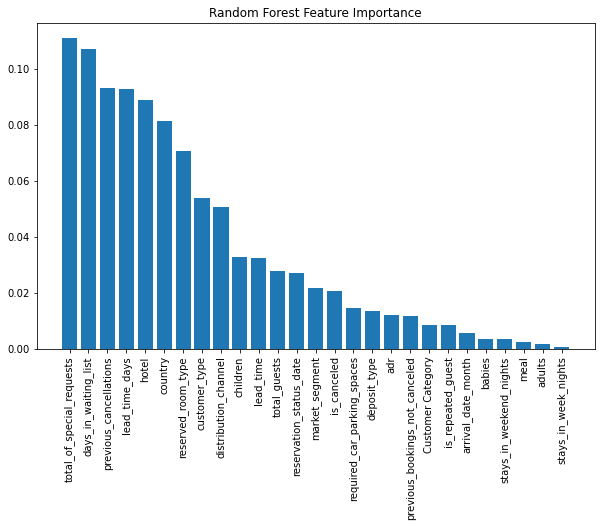

In [57]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importance_rf = rf.feature_importances_
sorted_idx_rf = np.argsort(importance_rf)[::-1]
features_rf = df.columns

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx_rf)), importance_rf[sorted_idx_rf])
plt.xticks(range(len(sorted_idx_rf)), [features_rf[i] for i in sorted_idx_rf], rotation=90)
plt.title('Random Forest Feature Importance')
plt.show()